In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("seismic-bumps.csv")

In [3]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


## Feature preprocessing (light)

In [4]:
#missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age'] = df['Age'].groupby([df['Sex'], df['Pclass']]).apply(lambda x: x.fillna(x.median()))

#remove useless variables from the dataset
column2drop = ['seismoacoustic', 'gdenergy', 'gdpuls', 'hazard','nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy']
df.drop(column2drop, axis=1, inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


## Pattern mining preprocessing

In [6]:
#df['AgeBin'] = pd.cut(df['Age'], 4)
df['AgeBin'] = pd.qcut(df['Age'], 4)
df['FareBin'] = pd.qcut(df['Fare'], 4)

df.drop(['Age', 'Fare'], axis=1, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Embarked,AgeBin,FareBin
0,0,3,male,S,"(21.5, 26.0]","(-0.001, 7.91]"
1,1,1,female,C,"(36.0, 80.0]","(31.0, 512.329]"
2,1,3,female,S,"(21.5, 26.0]","(7.91, 14.454]"
3,1,1,female,S,"(26.0, 36.0]","(31.0, 512.329]"
4,0,3,male,S,"(26.0, 36.0]","(7.91, 14.454]"


In [8]:
df['AgeBin'] = df['AgeBin'].astype(str) + '_Age'
df['FareBin'] = df['FareBin'].astype(str) + '_Fare'

In [9]:
df.head()

,Survived,Pclass,Sex,Embarked,AgeBin,FareBin
0,0,3,male,S,"(21.5, 26.0]_Age","(-0.001, 7.91]_Fare"
1,1,1,female,C,"(36.0, 80.0]_Age","(31.0, 512.329]_Fare"
2,1,3,female,S,"(21.5, 26.0]_Age","(7.91, 14.454]_Fare"
3,1,1,female,S,"(26.0, 36.0]_Age","(31.0, 512.329]_Fare"
4,0,3,male,S,"(26.0, 36.0]_Age","(7.91, 14.454]_Fare"


In [10]:
surv_dict = {0: 'Not Survived', 1: 'Survived'}
df['Survived'] = df['Survived'].map(surv_dict)

pclass_dict = {1: '1st', 2: '2nd', 3: '3rd'}
df['Pclass'] = df['Pclass'].map(pclass_dict)

In [11]:
df.head()

,Survived,Pclass,Sex,Embarked,AgeBin,FareBin
0,Not Survived,3rd,male,S,"(21.5, 26.0]_Age","(-0.001, 7.91]_Fare"
1,Survived,1st,female,C,"(36.0, 80.0]_Age","(31.0, 512.329]_Fare"
2,Survived,3rd,female,S,"(21.5, 26.0]_Age","(7.91, 14.454]_Fare"
3,Survived,1st,female,S,"(26.0, 36.0]_Age","(31.0, 512.329]_Fare"
4,Not Survived,3rd,male,S,"(26.0, 36.0]_Age","(7.91, 14.454]_Fare"


In [12]:
X = df.values.tolist()

In [13]:
X[0]

['Not Survived', '3rd', 'male', 'S', '(21.5, 26.0]_Age', '(-0.001, 7.91]_Fare']

In [14]:
# !pip install pyfim
from fim import apriori

In [15]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [16]:
#supp=2 ; 0.02
#supp=20 ; 0.2

itemsets = apriori(X, target='s', supp=2, zmin=3, report='S')

In [17]:
itemsets[:5]

[(('Q', '(21.5, 26.0]_Age', '3rd'), 3.0303030303030303),
 (('Q', '(21.5, 26.0]_Age', '(-0.001, 7.91]_Fare', '3rd'), 2.244668911335578),
 (('Q', '(21.5, 26.0]_Age', '(-0.001, 7.91]_Fare'), 2.244668911335578),
 (('Q',
   '(21.5, 26.0]_Age',
   '(-0.001, 7.91]_Fare',
   'Not Survived',
   '3rd',
   'male'),
  2.0202020202020203),
 (('Q', '(21.5, 26.0]_Age', '(-0.001, 7.91]_Fare', 'Not Survived', '3rd'),
  2.0202020202020203)]

In [18]:
# frequent itemset
itemsets[0][0]

('Q', '(21.5, 26.0]_Age', '3rd')

In [19]:
# support
itemsets[0][1]

3.0303030303030303

In [20]:
itemsets = apriori(X, target='m', supp=2, zmin=3, report='S')

In [21]:
itemsets[:5]

[(('Q',
   '(21.5, 26.0]_Age',
   '(-0.001, 7.91]_Fare',
   '3rd',
   'Not Survived',
   'male'),
  2.0202020202020203),
 (('Q', '(14.454, 31.0]_Fare', '3rd'), 2.0202020202020203),
 (('Q', '(-0.001, 7.91]_Fare', '(0.419, 21.5]_Age', 'female', '3rd'),
  2.4691358024691357),
 (('Q', '(-0.001, 7.91]_Fare', 'female', 'Survived', '3rd'),
  2.0202020202020203),
 (('Q', '(0.419, 21.5]_Age', 'female', 'Survived', '3rd'), 2.581369248035915)]

In [22]:
itemsets[0][0]

('Q', '(21.5, 26.0]_Age', '(-0.001, 7.91]_Fare', '3rd', 'Not Survived', 'male')

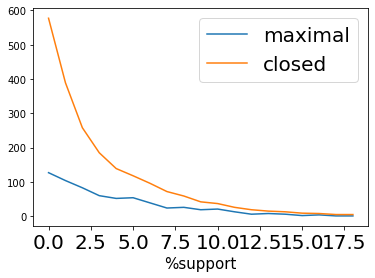

In [23]:
len_max_it = []
len_cl_it = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    cl_itemsets = apriori(X, target='c', supp=i, zmin=3)
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )
    
plt.plot(len_max_it, label='maximal')
plt.plot(len_cl_it, label='closed')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

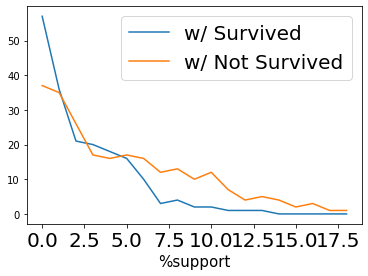

In [24]:
filter_1 = []
filter_2 = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    
    filter_1.append( len([item for item in max_itemsets if 'Survived' in item[0]])  )
    filter_2.append( len([item for item in max_itemsets if 'Not Survived' in item[0]]) )
    
plt.plot(filter_1, label='w/ Survived')
plt.plot(filter_2, label='w/ Not Survived')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

In [25]:
rules = apriori(X, target='r', supp=10, zmin=3, conf=60, report='aScl')

In [26]:
rules[:5]

[('1st',
  ('C', 'Survived'),
  59,
  6.621773288439956,
  0.6344086021505376,
  2.6169354838709675),
 ('female',
  ('C', 'Survived'),
  64,
  7.182940516273851,
  0.6881720430107527,
  1.9527429628107664),
 ('Not Survived',
  ('C', 'male'),
  66,
  7.4074074074074066,
  0.6947368421052632,
  1.127523727351165),
 ('S',
  ('2nd', 'Not Survived', 'male'),
  82,
  9.20314253647587,
  0.9010989010989011,
  1.2428469363453885),
 ('Not Survived',
  ('2nd', 'male', 'S'),
  82,
  9.20314253647587,
  0.845360824742268,
  1.3719790434341728)]

In [27]:
# <--
rules[0][0], rules[0][1]

('1st', ('C', 'Survived'))

In [28]:
# asbolute support
rules[0][2]

59

In [29]:
# support as percentage
rules[0][3]

6.621773288439956

In [30]:
# confidence
rules[0][4]

0.6344086021505376

In [31]:
# lift
rules[0][5]

2.6169354838709675

In [32]:
for r in rules:
    if r[0] == 'Survived':
        print(r)

('Survived', ('1st', '(31.0, 512.329]_Fare'), 109, 12.2334455667789, 0.6855345911949685, 1.7859980139026812)
('Survived', ('1st', 'female'), 91, 10.21324354657688, 0.9680851063829787, 2.5221164613661813)
('Survived', ('(31.0, 512.329]_Fare', 'female'), 95, 10.662177328843995, 0.8558558558558559, 2.22972972972973)
('Survived', ('(14.454, 31.0]_Fare', 'female'), 65, 7.295173961840629, 0.6989247311827957, 1.8208828522920204)
('Survived', ('(0.419, 21.5]_Age', 'female'), 82, 9.20314253647587, 0.6507936507936508, 1.6954887218045114)
('Survived', ('female', 'S'), 142, 15.937149270482603, 0.6926829268292682, 1.8046213093709884)


In [33]:
[r for r in rules if r[0] == 'Survived'][0]

('Survived',
 ('1st', '(31.0, 512.329]_Fare'),
 109,
 12.2334455667789,
 0.6855345911949685,
 1.7859980139026812)

In [34]:
print( 'to_predict:', [r for r in rules if r[0] == 'Survived'][0][0])
print( 'how?', [r for r in rules if r[0] == 'Survived'][0][1])

to_predict: Survived
how? ('1st', '(31.0, 512.329]_Fare')


In [35]:
# left for exercise

# using the same test set for classification (w/ random_state):
# predict the target variable with the most interesting rule:
# .... e.g., the most frequent;
# .... e.g., the one w/ max lift
# build a list of prediction, e.g. ['Survived', 'Not Survived', 'Survived']
# evaluate this prediction with precision/recall/confusion matrix etc.

In [36]:
len_r = []
for i in range(1, 20+1): #support
    len_r_wrt_i = []
    for j in range(60, 80+1): #confidence
        rules = apriori(X, target='r', supp=i, zmin=3, conf=j, report='aScl')
        
        len_r_wrt_i.append(len(rules)) # study your characteristics/properties here
        
    len_r.append(len_r_wrt_i)

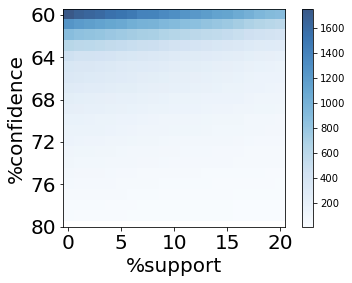

In [37]:
plt.imshow( len_r, cmap='Blues', alpha=0.8 )
plt.xlabel('%support', fontsize=20)
plt.ylabel('%confidence', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks( np.arange(0,20+1,4), np.arange(60,80+1,4), fontsize=20  )
plt.colorbar()

plt.show()